# Install and Import Required Libraries
Install the necessary libraries, including memorytools, and then import them.

In [1]:
%%capture captured_output
%pip install .
%pip install ipympl

In [2]:
# Import the necessary libraries
from memorytools.memorymonitor import MemoryMonitor
import matplotlib.pyplot as plt


## Process used to analyse

### Define constatns to be used



In [3]:
from memorytools import memoryanalysis
from datetime import timedelta
import psutil as ps
memoryanalysis.WIN_MIN_NUM_POINTS_RESAMPLE = 10 #Number of points in a dataset required to do a resample/any further analysis. Filters out very short running processes
memoryanalysis.RESAMPLE_MIN_WIN = timedelta(seconds=0.5).total_seconds() # 5ms as the resampled minimum domain gaps, should be an increase on the recorded delta time
memoryanalysis.WIN_MIN_NUM_POINTS_DETECT =  int(20) # points = 10s would be the smallest window size even with 
memoryanalysis.R_SQR_MIN = 0.9 #Require an increased confidence from the papers default of 0.8 since we are using a significantly smaller window size
memoryanalysis.CRITICAL_TIME_MAX = 60*60*1 # 1 hours
memoryanalysis.CRITICAL_MEMORY_USAGE = ps.virtual_memory().total
memoryanalysis.MAX_TIME_DIFF = 0.5
memoryanalysis.DEBUG_PLOTTING = True


### Load Data from File
Use memorytools to load data from the '/home/bpc/Documents/memorytools/data/tdcstst_continuous_monitoring.dat' file.

In [4]:
# Load the data from the file
tdcs_cont = MemoryMonitor()
tdcs_cont.import_from_csv("data/tdcstst testing/dt0.001s/tdcstst_387927.csv")

NO MEMORY DATA FILE FOUND


### Find which tdcstst processes are showing as leaking


In [5]:
abnorm_pid, abnorm_names = tdcs_cont.detect_leaks("LBR")

tdcsimControl-337691: Insufficient data for process tdcsimControl with pid 337691
tdcsimControl-337691: Unable to resample 1/1
tdcststControl-337692: Insufficient data for process tdcststControl with pid 337692
tdcststControl-337692: Unable to resample 1/1
tdcsimControl-337942: Insufficient data for process tdcsimControl with pid 337942
tdcsimControl-337942: Unable to resample 1/1
tdcststControl-337943: Insufficient data for process tdcststControl with pid 337943
tdcststControl-337943: Unable to resample 1/1
tdcsimControl-337996: Insufficient data for process tdcsimControl with pid 337996
tdcsimControl-337996: Unable to resample 1/1
tdcststControl-337998: Insufficient data for process tdcststControl with pid 337998
tdcststControl-337998: Unable to resample 1/1
tdcsimControl-338055: Insufficient data for process tdcsimControl with pid 338055
tdcsimControl-338055: Unable to resample 1/1
tdcststControl-338057: Insufficient data for process tdcststControl with pid 338057
tdcststControl-338

# Continuous monitoing of tdcstst

In [6]:
# Load the data from the file
tdcs_cont = MemoryMonitor()
tdcs_cont.import_from_csv("data/tdcstst testing/dt0.001s/tdcstst_377208.csv")

NO MEMORY DATA FILE FOUND


In [7]:
abnorm_pid, abnorm_names = tdcs_cont.detect_leaks("LBR")

tdcsimControl-271474: Insufficient data for process tdcsimControl with pid 271474
tdcsimControl-271474: Unable to resample 2/2
tdcststControl-271476: Insufficient data for process tdcststControl with pid 271476
tdcststControl-271476: Unable to resample 2/2
tdcsimControl-271729: Insufficient data for process tdcsimControl with pid 271729
tdcsimControl-271729: Unable to resample 1/1
tdcststControl-271730: Insufficient data for process tdcststControl with pid 271730
tdcststControl-271730: Unable to resample 1/1
tdcsimControl-271785: Insufficient data for process tdcsimControl with pid 271785
tdcsimControl-271785: Unable to resample 1/1
tdcststControl-271787: Insufficient data for process tdcststControl with pid 271787
tdcststControl-271787: Unable to resample 1/1
tdcsimControl-271842: Insufficient data for process tdcsimControl with pid 271842
tdcsimControl-271842: Unable to resample 1/1
tdcststControl-271844: Insufficient data for process tdcststControl with pid 271844
tdcststControl-271

/home/bpc/Documents/memorytools/memorytools/memorymonitor.py:189: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/home/bpc/Documents/memorytools/memorytools/memorymonitor.py:189: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()
/home/bpc/Documents/memorytools/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


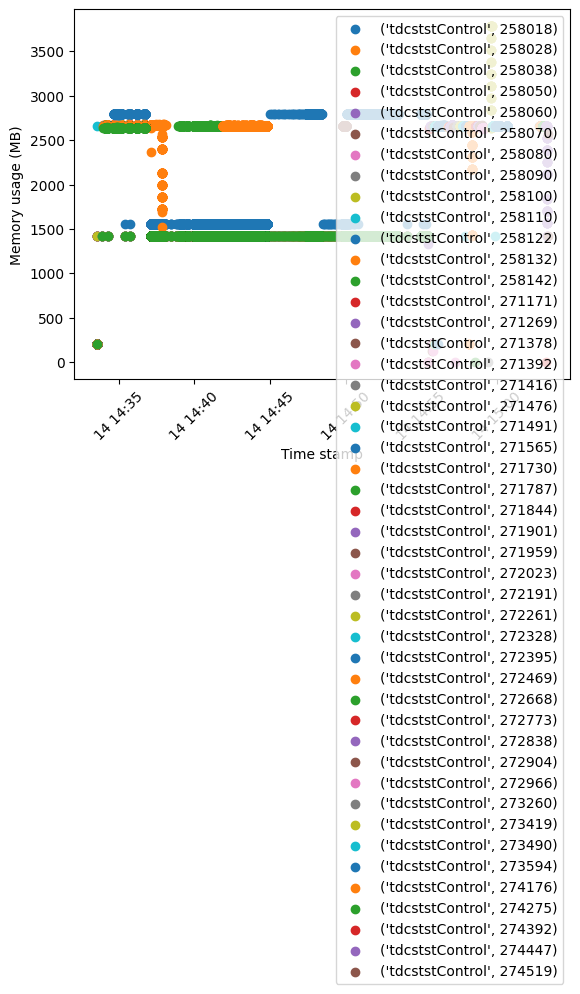

<module 'matplotlib.pyplot' from '/home/bpc/Documents/memorytools/.venv/lib/python3.11/site-packages/matplotlib/pyplot.py'>

In [8]:
# %matplotlib widget
tdcs_cont.plot_data_to_screen(names=["tdcststControl"])

# TDCSArv @1s intervals - testing known leaking data sets

Parameters used
WIN_MIN_NUM_POINTS_DETECT =  60 # points = 10 seconds
WIN_MIN_NUM_POINTS_RESAMPLE = 10 #Number of points required to do a resample/any further analysis 
RESAMPLE_MIN_WIN = timedelta(seconds=0.5).total_seconds() # 100ms
R_SQR_MIN = 0.9 #From paper
CRITICAL_TIME_MAX = 60*60*1 # 1 hours
CRITICAL_MEMORY_USAGE = ps.virtual_memory().total

## Revision -377028 - Leaking 
Description of error

NO MEMORY DATA FILE FOUND
ccsScheduler1-400769: Insufficient data for process ccsScheduler1 with pid 400769
ccsScheduler1-400769: Unable to resample 309/309
ccsSHManager-400772: Insufficient data for process ccsSHManager with pid 400772
ccsSHManager-400772: Unable to resample 309/309
qsemu-400780: Insufficient data for process qsemu with pid 400780
qsemu-400780: Unable to resample 309/309
timsTimeKeeper-400781: Insufficient data for process timsTimeKeeper with pid 400781
timsTimeKeeper-400781: Unable to resample 309/309
rtdcoreServer-400783: Insufficient data for process rtdcoreServer with pid 400783
rtdcoreServer-400783: Unable to resample 309/309
dbMQDBM-400786: Insufficient data for process dbMQDBM with pid 400786
dbMQDBM-400786: Unable to resample 309/309
cmdManager-400789: Insufficient data for process cmdManager with pid 400789
cmdManager-400789: Unable to resample 309/309
msgServer-400790: Insufficient data for process msgServer with pid 400790
msgServer-400790: Unable to resamp

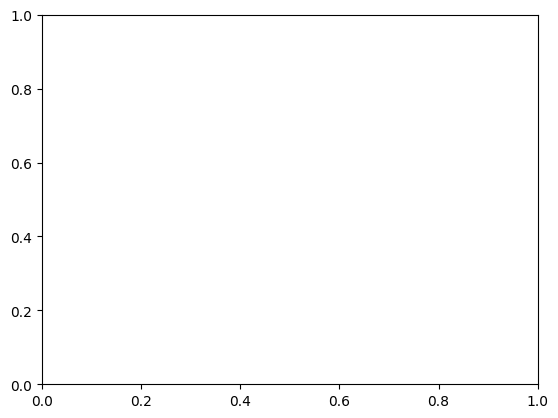

In [9]:
plt.cla()
tdcsarv_377208 = MemoryMonitor()
tdcsarv_377208.import_from_csv("data/tdcsarv testing/1s granularity/csv files/tdcsarv_377208.csv")

abnorm_pid, abnorm_names = tdcsarv_377208.detect_leaks("LBR")

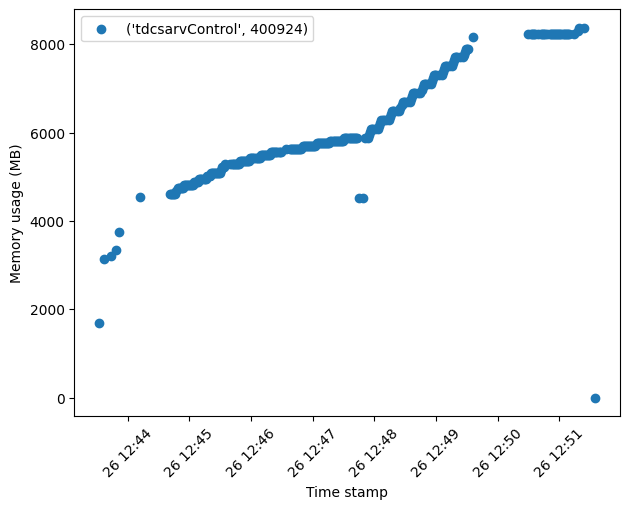

<module 'matplotlib.pyplot' from '/home/bpc/Documents/memorytools/.venv/lib/python3.11/site-packages/matplotlib/pyplot.py'>

In [10]:
plt.cla()
tdcsarv_377208.plot_data_to_screen([400924])

## Revision - 382396 - Leaking 
Description of error

NO MEMORY DATA FILE FOUND
ccsScheduler1-419410: Insufficient data for process ccsScheduler1 with pid 419410
ccsScheduler1-419410: Unable to resample 317/317
ccsSHManager-419413: Insufficient data for process ccsSHManager with pid 419413
ccsSHManager-419413: Unable to resample 317/317
qsemu-419421: Insufficient data for process qsemu with pid 419421
qsemu-419421: Unable to resample 317/317
dbMQDBM-419422: Insufficient data for process dbMQDBM with pid 419422
dbMQDBM-419422: Unable to resample 317/317
timsTimeKeeper-419423: Insufficient data for process timsTimeKeeper with pid 419423
timsTimeKeeper-419423: Unable to resample 317/317
rtdcoreServer-419424: Insufficient data for process rtdcoreServer with pid 419424
rtdcoreServer-419424: Unable to resample 317/317
cmdManager-419430: Insufficient data for process cmdManager with pid 419430
cmdManager-419430: Unable to resample 317/317
msgServer-419431: Insufficient data for process msgServer with pid 419431
msgServer-419431: Unable to resamp

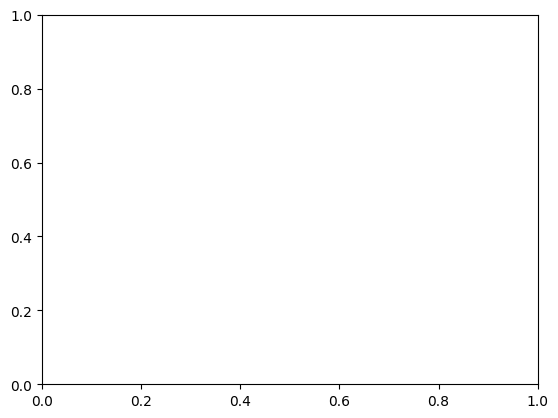

In [11]:
plt.cla()
tdcsarv_382396 = MemoryMonitor()
tdcsarv_382396.import_from_csv("data/tdcsarv testing/1s granularity/csv files/tdcsarv_382396.csv")

abnorm_pid, abnorm_names = tdcsarv_382396.detect_leaks("LBR")

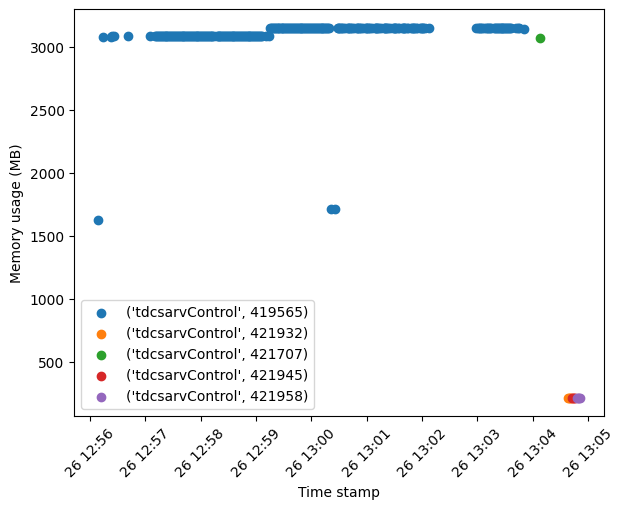

<module 'matplotlib.pyplot' from '/home/bpc/Documents/memorytools/.venv/lib/python3.11/site-packages/matplotlib/pyplot.py'>

In [12]:
# %matplotlib widget
plt.cla()
tdcsarv_382396.plot_data_to_screen([419565,421932,421707,421945,421958])
# html_str = mpld3.fig_to_html(tdcsarv_382396.plot_data_to_screen([419565]))
# Html_file= open("index.html","w")
# Html_file.write(html_str)
# Html_file.close()


## Revision -387927 - Not leaking 
No leak trunk version

In [13]:
tdcsarv_387927 = MemoryMonitor()
tdcsarv_387927.import_from_csv("data/tdcsarv testing/1s granularity/csv files/tdcsarv_387927.csv")

abnorm_pid, abnorm_names = tdcsarv_387927.detect_leaks("LBR")

NO MEMORY DATA FILE FOUND
ccsScheduler1-438318: Insufficient data for process ccsScheduler1 with pid 438318
ccsScheduler1-438318: Unable to resample 305/305
ccsSHManager-438321: Insufficient data for process ccsSHManager with pid 438321
ccsSHManager-438321: Unable to resample 305/305
qsemu-438326: Insufficient data for process qsemu with pid 438326
qsemu-438326: Unable to resample 305/305
dbMQDBM-438327: Insufficient data for process dbMQDBM with pid 438327
dbMQDBM-438327: Unable to resample 305/305
timsTimeKeeper-438328: Insufficient data for process timsTimeKeeper with pid 438328
timsTimeKeeper-438328: Unable to resample 305/305
rtdcoreServer-438329: Insufficient data for process rtdcoreServer with pid 438329
rtdcoreServer-438329: Unable to resample 305/305
cmdManager-438335: Insufficient data for process cmdManager with pid 438335
cmdManager-438335: Unable to resample 305/305
msgServer-438336: Insufficient data for process msgServer with pid 438336
msgServer-438336: Unable to resamp

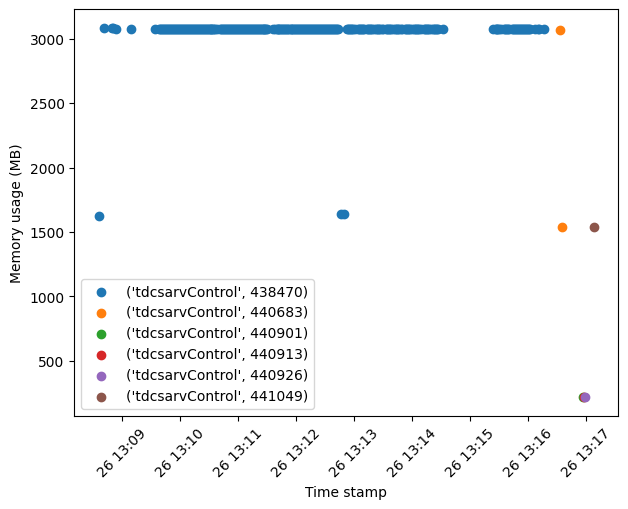

<module 'matplotlib.pyplot' from '/home/bpc/Documents/memorytools/.venv/lib/python3.11/site-packages/matplotlib/pyplot.py'>

In [14]:
plt.cla()
tdcsarv_387927.plot_data_to_screen(names=["tdcsarvControl"])


# TDCSARV @0.005

## Revision -377028 - Leaking 
Description of error

NO MEMORY DATA FILE FOUND
ccsNextPhase-596828: Insufficient data for process ccsNextPhase with pid 596828
ccsNextPhase-596828: Unable to resample 1/1


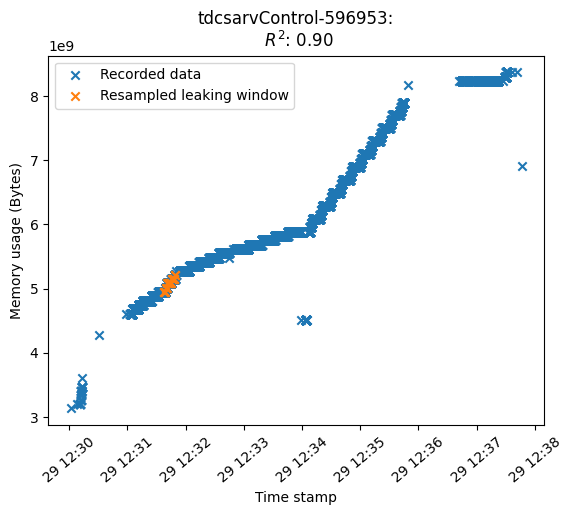

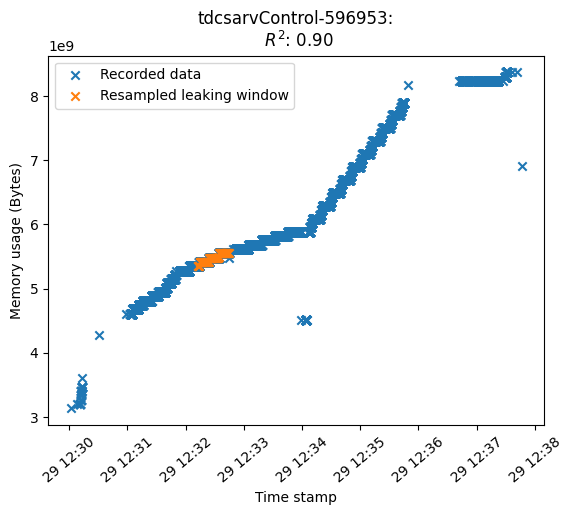

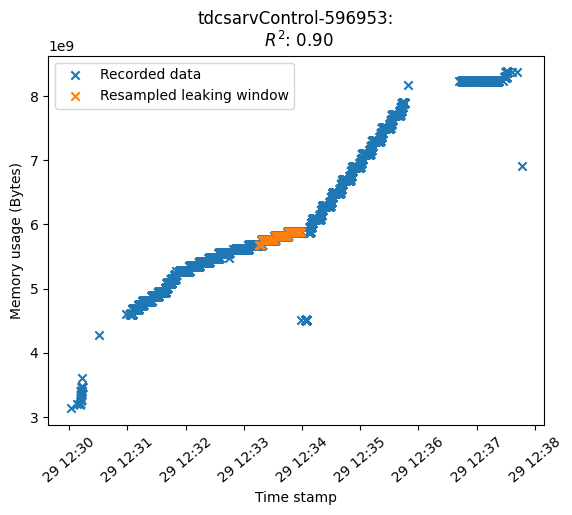

tdcsimControl-599572: Insufficient data for process tdcsimControl with pid 599572
tdcsimControl-599572: Unable to resample 2/2
tdcsarvControl-599573: Insufficient data for process tdcsarvControl with pid 599573
tdcsarvControl-599573: Unable to resample 2/2
tdcsarvTestErrCt-599581: Insufficient data for process tdcsarvTestErrCt with pid 599581
tdcsarvTestErrCt-599581: Unable to resample 1/1
tdcsimControl-599997: Insufficient data for process tdcsimControl with pid 599997
tdcsimControl-599997: Unable to resample 1/1
tdcsimControl-600007: Insufficient data for process tdcsimControl with pid 600007
tdcsimControl-600007: Unable to resample 1/1
Unable to process 6/24
Abnormal memory usage detected in process: tdcsarvControlwith pid 596953


In [15]:
# %matplotlib widget
import time
plt.cla()
start_time = time.time()
tdcsarv_377208 = MemoryMonitor()
tdcsarv_377208.import_from_csv("data/tdcsarv testing/0.001s granularity/csv files/tdcsarv_377208.csv")

abnorm_pid, abnorm_names = tdcsarv_377208.detect_leaks("LBR")
stop_time = time.time()


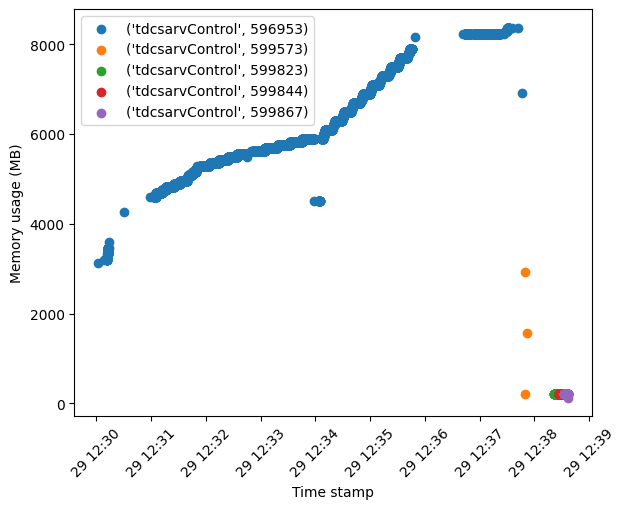

<module 'matplotlib.pyplot' from '/home/bpc/Documents/memorytools/.venv/lib/python3.11/site-packages/matplotlib/pyplot.py'>

In [16]:
plt.cla()
# %matplotlib widget
# tdcsarv_377208.plot_data_to_screen([596953])
tdcsarv_377208.plot_data_to_screen(names=["tdcsarvControl"])

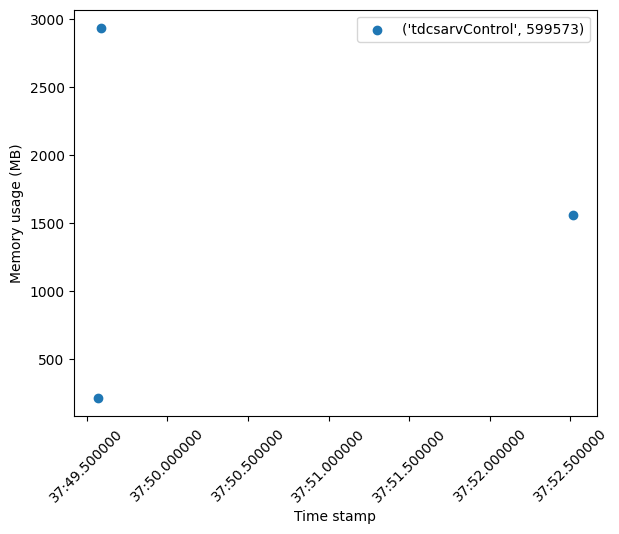

<module 'matplotlib.pyplot' from '/home/bpc/Documents/memorytools/.venv/lib/python3.11/site-packages/matplotlib/pyplot.py'>

In [17]:
plt.cla()
tdcsarv_377208.plot_data_to_screen(proc_pids=[599573])

## Revision - 382396 - Leaking 
Description of error

NO MEMORY DATA FILE FOUND
ccsNextPhase-616547: Insufficient data for process ccsNextPhase with pid 616547
ccsNextPhase-616547: Unable to resample 1/1
tdcsimControl-619534: Insufficient data for process tdcsimControl with pid 619534
tdcsimControl-619534: Unable to resample 3/3
tdcsarvControl-619535: Insufficient data for process tdcsarvControl with pid 619535
tdcsarvControl-619535: Unable to resample 3/3
tdcsarvTestErrCt-619543: Insufficient data for process tdcsarvTestErrCt with pid 619543
tdcsarvTestErrCt-619543: Unable to resample 2/2
tdcsimControl-619972: Insufficient data for process tdcsimControl with pid 619972
tdcsimControl-619972: Unable to resample 1/1
tdcsimControl-620101: Insufficient data for process tdcsimControl with pid 620101
tdcsimControl-620101: Unable to resample 1/1
tdcsimControl-620110: Insufficient data for process tdcsimControl with pid 620110
tdcsimControl-620110: Unable to resample 1/1
Unable to process 7/25


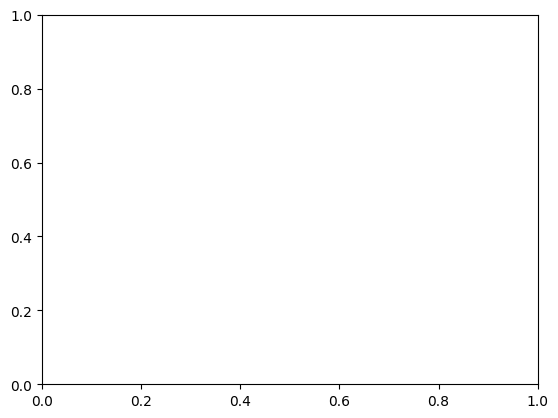

In [18]:
plt.cla()
tdcsarv_382396 = MemoryMonitor()
tdcsarv_382396.import_from_csv("data/tdcsarv testing/0.001s granularity/csv files/tdcsarv_382396.csv")

abnorm_pid, abnorm_names = tdcsarv_382396.detect_leaks("LBR")

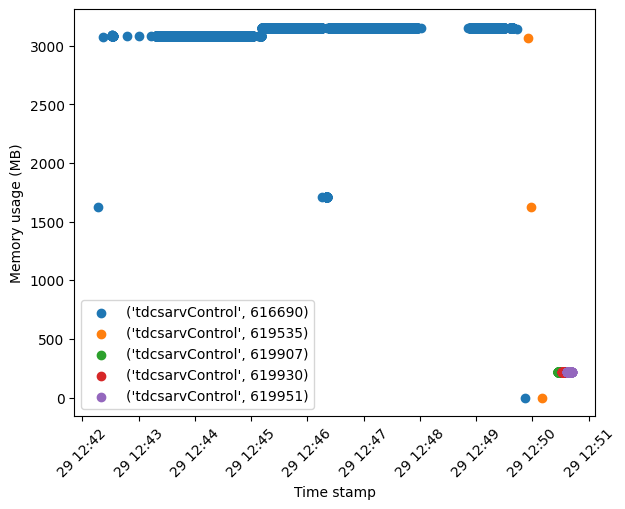

<module 'matplotlib.pyplot' from '/home/bpc/Documents/memorytools/.venv/lib/python3.11/site-packages/matplotlib/pyplot.py'>

In [19]:
# %matplotlib widget
plt.cla()
tdcsarv_382396.plot_data_to_screen(names=["tdcsarvControl"])

## Revision -387927 - Not leaking 
No leak trunk version

In [20]:
tdcsarv_387927 = MemoryMonitor()
tdcsarv_387927.import_from_csv("data/TDCSARV testing/0.001s granularity/csv files/tdcsarv_387927.csv")

abnorm_pid, abnorm_names = tdcsarv_387927.detect_leaks("LBR")

NO MEMORY DATA FILE FOUND
ccsNextPhase-636582: Insufficient data for process ccsNextPhase with pid 636582
ccsNextPhase-636582: Unable to resample 2/2
tdcsimControl-639695: Insufficient data for process tdcsimControl with pid 639695
tdcsimControl-639695: Unable to resample 3/3
tdcsarvControl-639696: Insufficient data for process tdcsarvControl with pid 639696
tdcsarvControl-639696: Unable to resample 3/3
tdcsarvTestErrCt-639704: Insufficient data for process tdcsarvTestErrCt with pid 639704
tdcsarvTestErrCt-639704: Unable to resample 2/2
tdcsarvTestErrC-639914: Insufficient data for process tdcsarvTestErrC with pid 639914
tdcsarvTestErrC-639914: Unable to resample 1/1
tdcsimControl-640054: Insufficient data for process tdcsimControl with pid 640054
tdcsimControl-640054: Unable to resample 2/2
tdcsarvControl-640055: Insufficient data for process tdcsarvControl with pid 640055
tdcsarvControl-640055: Unable to resample 1/1
tdcsimControl-640239: Insufficient data for process tdcsimControl w

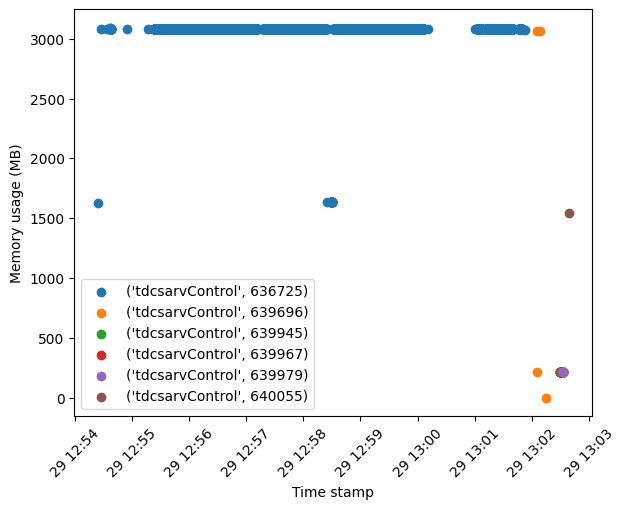

<module 'matplotlib.pyplot' from '/home/bpc/Documents/memorytools/.venv/lib/python3.11/site-packages/matplotlib/pyplot.py'>

In [21]:
plt.cla()
tdcsarv_387927.plot_data_to_screen(names=["tdcsarvControl"])

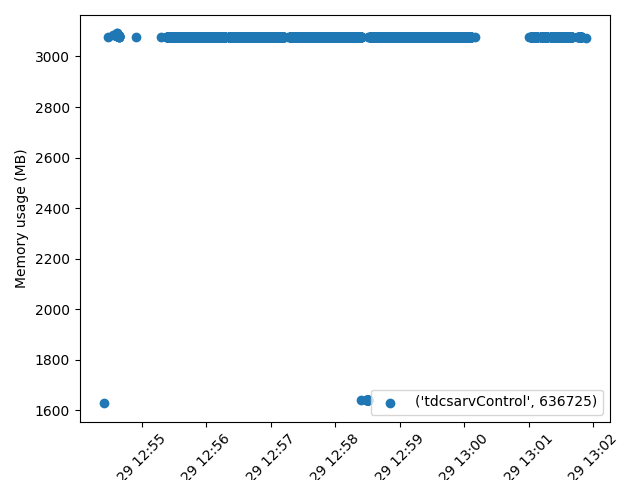

<module 'matplotlib.pyplot' from '/home/bpc/Documents/memorytools/.venv/lib/python3.11/site-packages/matplotlib/pyplot.py'>

In [22]:
%matplotlib widget
plt.cla()
tdcsarv_387927.plot_data_to_screen(proc_pids=[636725])

# TDCSARV @0.5s

In [23]:
#Parameters

from memorytools import memoryanalysis
from datetime import timedelta
import psutil as ps
memoryanalysis.WIN_MIN_NUM_POINTS_DETECT = 100 # points = 10 seconds
memoryanalysis.WIN_MIN_NUM_POINTS_RESAMPLE = 10 #Number of points required to do a resample/any further analysis 10s
memoryanalysis.RESAMPLE_MIN_WIN = timedelta(seconds=0.05).total_seconds() # 0.5ms
memoryanalysis.R_SQR_MIN = 0.9 #From paper
memoryanalysis.CRITICAL_TIME_MAX = 60*60*1 # 1 hours
memoryanalysis.CRITICAL_MEMORY_USAGE = ps.virtual_memory().total

## Revision -377028 - Leaking 
Description of error

In [24]:
# %matplotlib widget
plt.cla()
tdcsarv_377208 = MemoryMonitor()
tdcsarv_377208.import_from_csv("data/tdcsarv testing/dt0.5s/csv files/tdcsarv_377208.csv")



NO MEMORY DATA FILE FOUND


ccsNextPhase-1152090: Insufficient data for process ccsNextPhase with pid 1152090
ccsNextPhase-1152090: Unable to resample 2/2


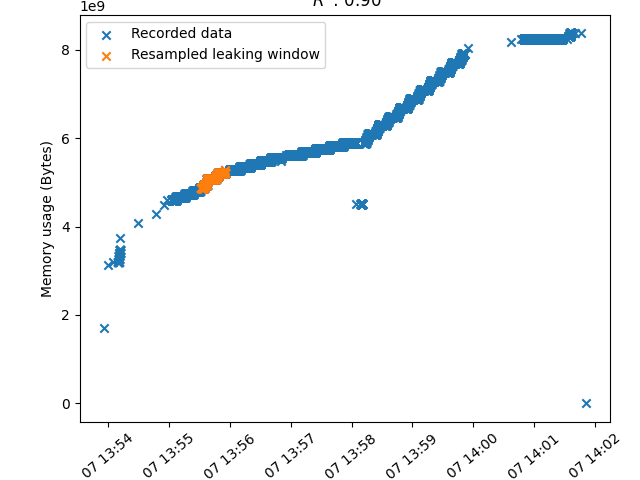

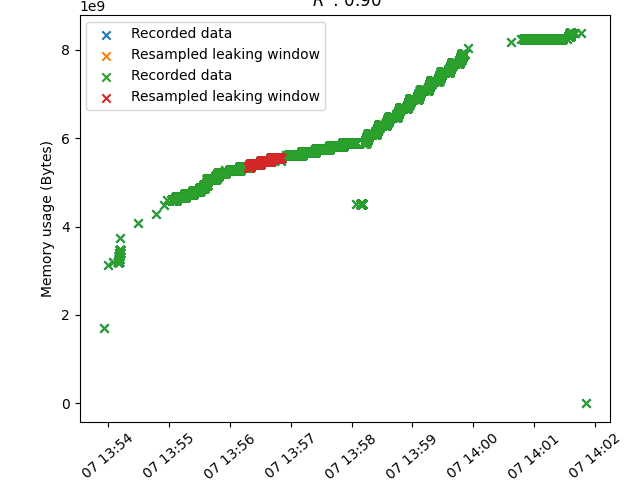

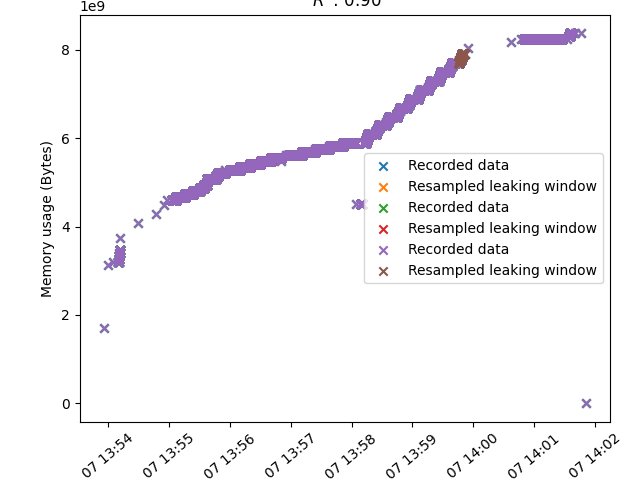

tdcsimControl-1154259: Insufficient data for process tdcsimControl with pid 1154259
tdcsimControl-1154259: Unable to resample 3/3
tdcsarvControl-1154260: Insufficient data for process tdcsarvControl with pid 1154260
tdcsarvControl-1154260: Unable to resample 3/3
tdcsarvTestErrCt-1154268: Insufficient data for process tdcsarvTestErrCt with pid 1154268
tdcsarvTestErrCt-1154268: Unable to resample 3/3
Unable to process 4/22
Abnormal memory usage detected in process: tdcsarvControlwith pid 1152220


In [25]:
# %matplotlib widget
abnorm_pid, abnorm_names = tdcsarv_377208.detect_leaks("LBR")

In [26]:
# %matplotlib widget
# plt.cla()
# tdcsarv_377208.plot_data_to_screen([596953])

## Revision - 382396 - Leaking 
Description of error

In [27]:
%matplotlib inline
plt.cla()
tdcsarv_382396 = MemoryMonitor()
tdcsarv_382396.import_from_csv("data/tdcsarv testing/dt0.5s/csv files/tdcsarv_382396.csv")

NO MEMORY DATA FILE FOUND


In [28]:
abnorm_pid, abnorm_names = tdcsarv_382396.detect_leaks("LBR")

ccsNextPhase-1171015: Insufficient data for process ccsNextPhase with pid 1171015
ccsNextPhase-1171015: Unable to resample 1/1
tdcsimControl-1173339: Insufficient data for process tdcsimControl with pid 1173339
tdcsimControl-1173339: Unable to resample 2/2
tdcsarvControl-1173340: Insufficient data for process tdcsarvControl with pid 1173340
tdcsarvControl-1173340: Unable to resample 2/2
tdcsarvTestErrCt-1173348: Insufficient data for process tdcsarvTestErrCt with pid 1173348
tdcsarvTestErrCt-1173348: Unable to resample 2/2
tdcsimControl-1173617: Insufficient data for process tdcsimControl with pid 1173617
tdcsimControl-1173617: Unable to resample 1/1
tdcsimControl-1173729: Insufficient data for process tdcsimControl with pid 1173729
tdcsimControl-1173729: Unable to resample 1/1
tdcsimControl-1173749: Insufficient data for process tdcsimControl with pid 1173749
tdcsimControl-1173749: Unable to resample 1/1
tdcsarvControl-1173750: Insufficient data for process tdcsarvControl with pid 117

## Revision -387927 - Not leaking 
No leak trunk version

In [29]:
plt.cla()
tdcsarv_387927 = MemoryMonitor()
tdcsarv_387927.import_from_csv("data/tdcsarv testing/dt0.5s/csv files/tdcsarv_387927.csv")

abnorm_pid, abnorm_names = tdcsarv_387927.detect_leaks("LBR")

NO MEMORY DATA FILE FOUND
ccsNextPhase-1190197: Insufficient data for process ccsNextPhase with pid 1190197
ccsNextPhase-1190197: Unable to resample 1/1
tdcsimControl-1192597: Insufficient data for process tdcsimControl with pid 1192597
tdcsimControl-1192597: Unable to resample 2/2
tdcsarvControl-1192598: Insufficient data for process tdcsarvControl with pid 1192598
tdcsarvControl-1192598: Unable to resample 2/2
tdcsarvTestErrCt-1192606: Insufficient data for process tdcsarvTestErrCt with pid 1192606
tdcsarvTestErrCt-1192606: Unable to resample 2/2
tdcsarvTestErrCt-1192796: Insufficient data for process tdcsarvTestErrCt with pid 1192796
tdcsarvTestErrCt-1192796: Unable to resample 1/1
tdcsimControl-1192858: Insufficient data for process tdcsimControl with pid 1192858
tdcsimControl-1192858: Unable to resample 1/1
tdcsimControl-1192972: Insufficient data for process tdcsimControl with pid 1192972
tdcsimControl-1192972: Unable to resample 1/1
tdcsimControl-1193027: Insufficient data for p

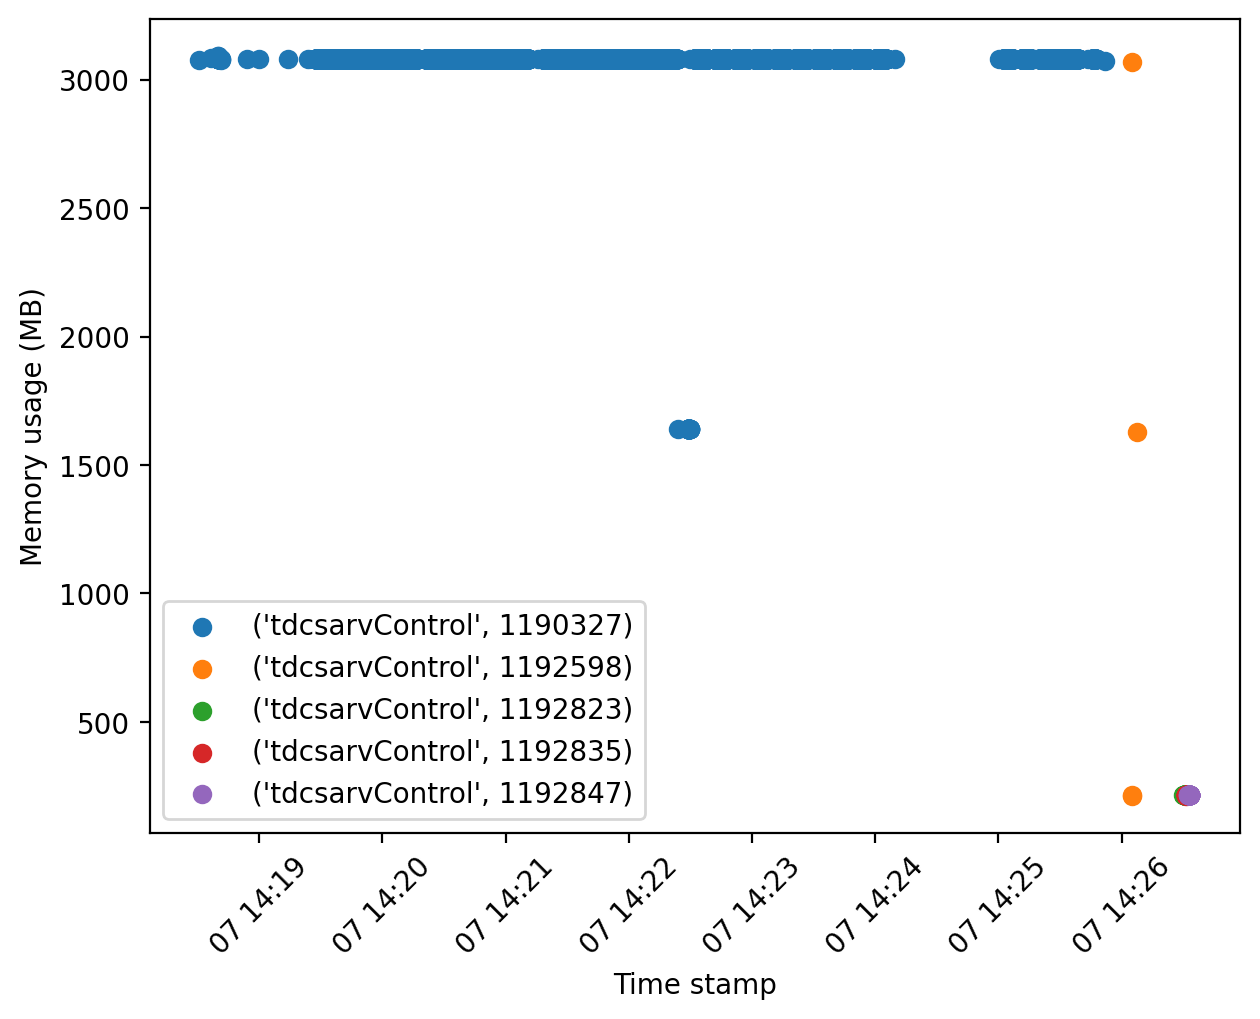

<module 'matplotlib.pyplot' from '/home/bpc/Documents/memorytools/.venv/lib/python3.11/site-packages/matplotlib/pyplot.py'>

In [30]:
plt.cla()
tdcsarv_387927.plot_data_to_screen(names=["tdcsarvControl"])